In [30]:
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D, Activation
from keras import losses
from keras.preprocessing.image import load_img, ImageDataGenerator
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import class_weight
from sklearn.metrics import recall_score, confusion_matrix, precision_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
import xlsxwriter
import time
from PIL import Image

#All imports
'''This notebook is a convolutional neural network for hurricane category classification'''

'This notebook is a convolutional neural network for hurricane category classification'

In [31]:
seed = round(time.time())
print(seed)

1585594603


In [32]:
# input image dimensions
img_width, img_height = 800, 375

train_data_dir = 'Data/Training'
validation_data_dir = 'Data/Validation'
nb_train_samples = 1000
nb_validation_samples = 100
epochs = 50
batch_size=20

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3) #800, 375, 3

train_datagen = ImageDataGenerator(rescale=1/255)

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8607 images belonging to 6 classes.
Found 956 images belonging to 6 classes.


In [33]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=input_shape)) #This is the final filter for feature extraction.
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64)) #Must be the same as the filter above.
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(6))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 798, 373, 32)      896       
_________________________________________________________________
activation_36 (Activation)   (None, 798, 373, 32)      0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 399, 186, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 397, 184, 32)      9248      
_________________________________________________________________
activation_37 (Activation)   (None, 397, 184, 32)      0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 198, 92, 32)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 196, 90, 64)       18496     
__________

Epoch 1/50
50/50 [==============================] - 383s 8s/step - loss: 3.6615 - acc: 0.7580 - val_loss: 2.9013 - val_acc: 0.8200
Epoch 2/50
50/50 [==============================] - 392s 8s/step - loss: 3.3203 - acc: 0.7940 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 3/50
50/50 [==============================] - 353s 7s/step - loss: 3.0302 - acc: 0.8120 - val_loss: 3.0624 - val_acc: 0.8100
Epoch 4/50
50/50 [==============================] - 391s 8s/step - loss: 3.2720 - acc: 0.7970 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 5/50
50/50 [==============================] - 416s 8s/step - loss: 3.6266 - acc: 0.7750 - val_loss: 3.7072 - val_acc: 0.7700
Epoch 6/50
50/50 [==============================] - 371s 7s/step - loss: 3.4170 - acc: 0.7880 - val_loss: 2.9013 - val_acc: 0.8200
Epoch 7/50
50/50 [==============================] - 371s 7s/step - loss: 3.4815 - acc: 0.7840 - val_loss: 2.9013 - val_acc: 0.8200
Epoch 8/50
50/50 [==============================] - 368s 7s/step - loss: 3.0463 - a

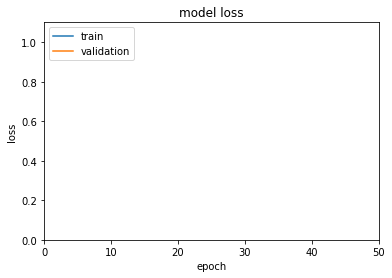

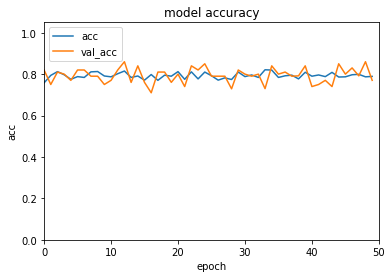

In [34]:
#Unable to compile until labels are set

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

p = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs = epochs, #This was defined earlier as 50
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

#model.save_weights('weights.h5')
#Plotting Accuracy
plt.plot(p.history['acc'])
plt.plot(p.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.axis([0, 50, 0.0, 1.05])
plt.show()

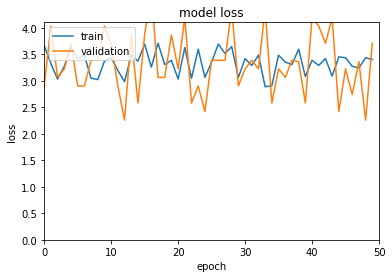

In [35]:
#Plotting loss
plt.plot(p.history['loss'])
plt.plot(p.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.axis([0, 50, 0.0, 4.10])
plt.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(1200, 600)


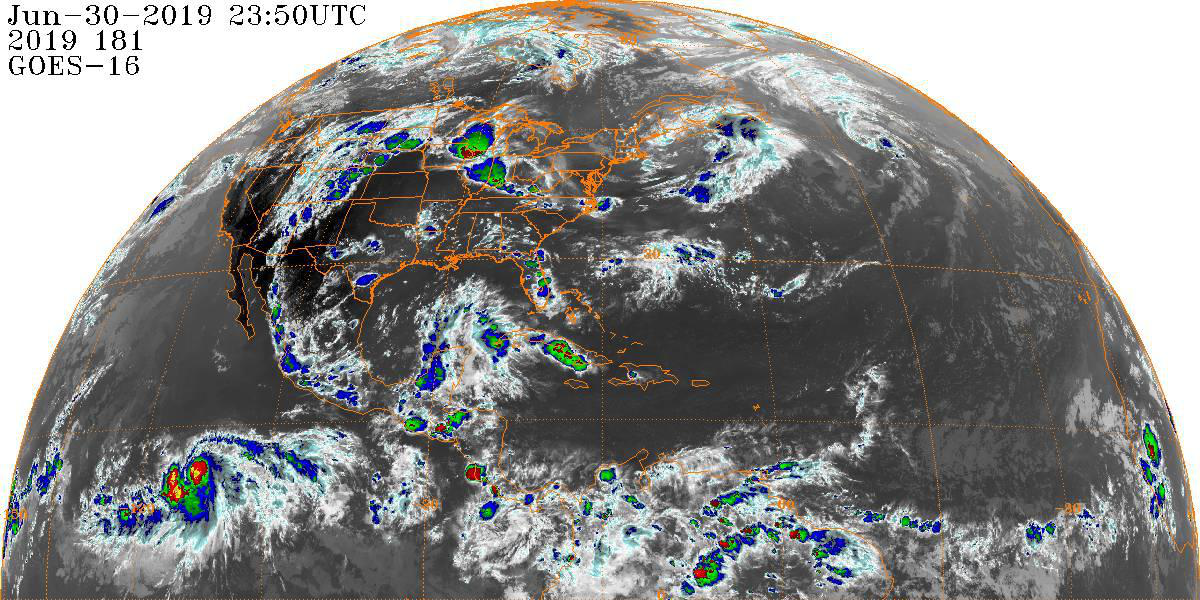

In [9]:
img1 = load_img('Data/Training/2019-07-01-00.jpg')
print(type(img1))
print(img1.format)
print(img1.mode)
print(img1.size)
Image.open('Data/Training/2019-07-01-00.jpg')

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(800, 375)


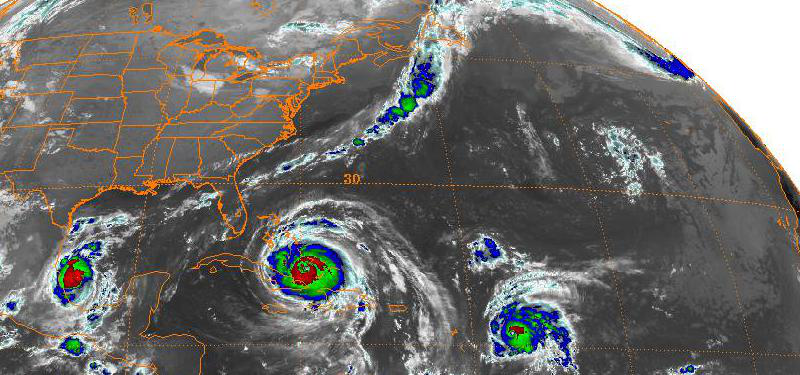

In [6]:
img1 = load_img('Data/Training/5/2017-09-08-12.jpg')
print(type(img1))
print(img1.format)
print(img1.mode)
print(img1.size)
Image.open('Data/Training/5/2017-09-08-12.jpg')